$s$

In [1]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v4_vehicles
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()

In [2]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [27]:
m.joints

jcl_uca_rev    <constraints.revolute object at 0x000001F94B61...
jcr_uca_rev    <constraints.revolute object at 0x000001F94B62...
jcl_ucr        <constraints.spherical object at 0x000001F94B9...
jcr_ucr        <constraints.spherical object at 0x000001F94CC...
dtype: object

In [28]:
j = m.joints['jcr_ucr']
j.location

point object at [  130.   334.  1000.]

In [30]:
m.joints['jcl_uca_rev'].location

point object at [-130. -334.  807.]

In [23]:
j.u_i

array([[-130.],
       [-239.],
       [ -29.]])

In [24]:
j.u_j

array([[-130.],
       [ 334.],
       [ 807.]])

In [27]:
j.u_irf

array([[ 0.        ,  0.        ,  1.        ],
       [-0.70710678, -0.70710678,  0.        ],
       [ 0.70710678, -0.70710678,  0.        ]])

In [28]:
j.u_jrf

array([[ 0.        ,  0.        ,  1.        ],
       [-0.70710678, -0.70710678,  0.        ],
       [ 0.70710678, -0.70710678,  0.        ]])

In [11]:
j.axis

point object at [ 260.    0.    0.]

In [12]:
p  = point('p',[0,0,0])
b1 = rigid('b1')
b2 = rigid('b2')
j  = spherical('j',p,b1,b2)
j

In [13]:
j.location

point object at [0 0 0]

In [14]:
p.x=5

In [15]:
j.location

point object at [5 0 0]

In [16]:
p=point('p',[1,2,3])

In [17]:
j.location

point object at [5 0 0]

In [3]:
sys_joints=pd.read_pickle('front_suspension_v3tst')['joints']

In [4]:
import networkx as nx

In [5]:
topology = nx.Graph()
topology.add_edges_from([(i.i_body,i.j_body) for i in sys_joints])

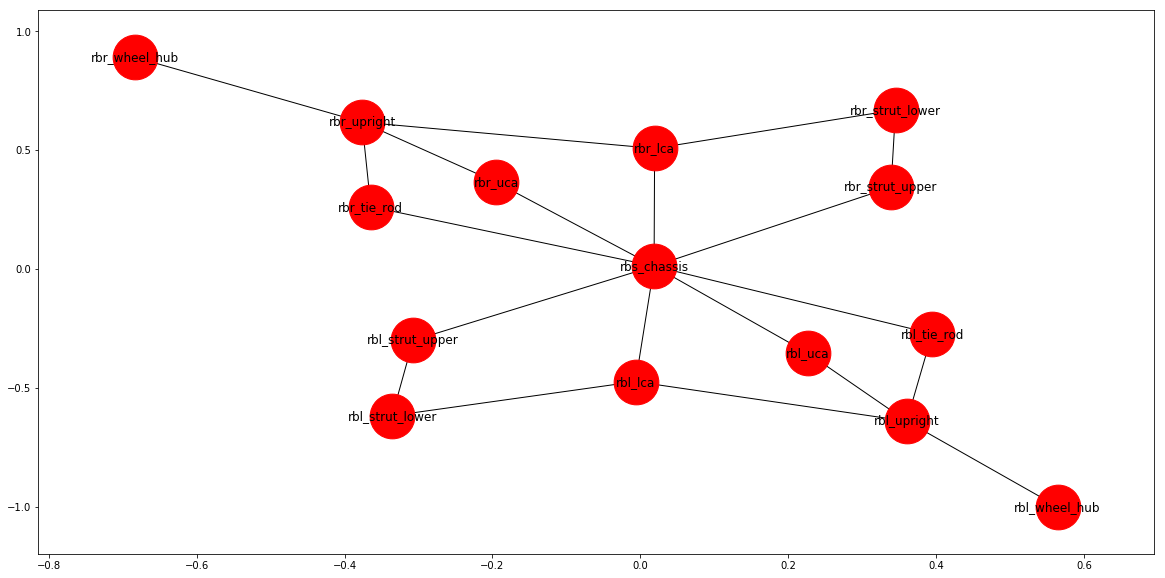

In [33]:
plt.figure(figsize=(20,10))
nx.draw_networkx(topology,with_labels=True,node_size=2000)
plt.show()

In [38]:
nx.attr_matrix(topology)

(matrix([[ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
           0.,  1.],
         [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
           0.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           1.,  0.],
         [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
           0.,  1.],
         [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
           1.,  0.],
         [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.],
         [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.],
         [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
           0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
           0.,  0.],
         [ 1.,  0.,  0.,  0.,  0.,  0., 

In [20]:
topology.nodes()

NodeView((rbl_upright, rbl_wheel_hub, rbl_lca, rbs_chassis, rbl_strut_upper, rbl_strut_lower, rbl_tie_rod, rbl_uca, rbr_upright, rbr_wheel_hub, rbr_lca, rbr_strut_upper, rbr_strut_lower, rbr_tie_rod, rbr_uca))

In [25]:
topology.edges()

EdgeView([(rbl_upright, rbl_wheel_hub), (rbl_upright, rbl_lca), (rbl_upright, rbl_tie_rod), (rbl_upright, rbl_uca), (rbl_lca, rbs_chassis), (rbl_lca, rbl_strut_lower), (rbs_chassis, rbl_strut_upper), (rbs_chassis, rbl_tie_rod), (rbs_chassis, rbl_uca), (rbs_chassis, rbr_lca), (rbs_chassis, rbr_strut_upper), (rbs_chassis, rbr_tie_rod), (rbs_chassis, rbr_uca), (rbl_strut_upper, rbl_strut_lower), (rbr_upright, rbr_wheel_hub), (rbr_upright, rbr_lca), (rbr_upright, rbr_tie_rod), (rbr_upright, rbr_uca), (rbr_lca, rbr_strut_lower), (rbr_strut_upper, rbr_strut_lower)])